In [183]:
%matplotlib inline

## Non Linear SVM Classification

Although linear SVM classifiers are efficient and often work suprisingly well, many datasets are not even close to being linearly seperable.  

One approach to handeling non linear dataset is to add more features , such as polynomial features, in some cases it will lead to linearly seperatble datasets.

**Lets use moon dataset to show how it works**

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [148]:
from sklearn.svm import LinearSVC

In [149]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

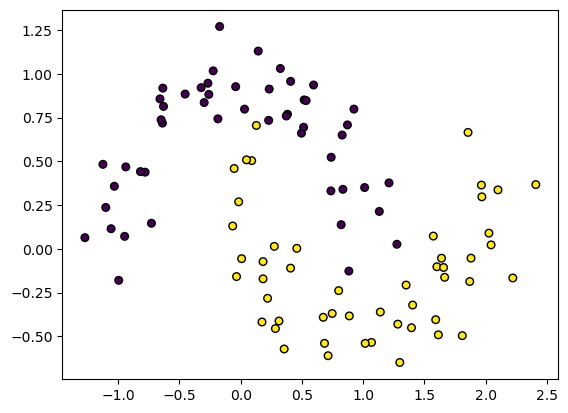

In [150]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k')

## This looks like we cannot linearlt seperate this data. 

Let us try fitting a linearSVC and see

In [163]:
linear_svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=10, max_iter=10_000, random_state=42))
linear_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

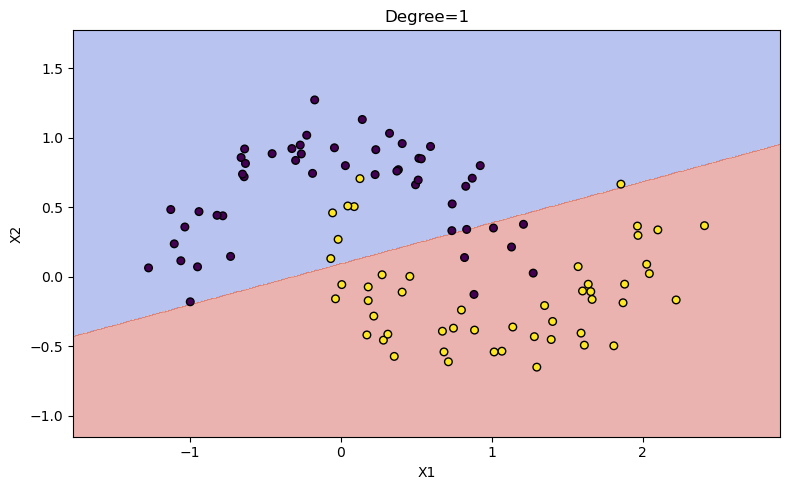

In [188]:
# Plotting decision boundaries
fig, axes = plt.subplots(1, 1, figsize=(8, 5))

def get_decision_boundary_plot(X,y, model, degree ,ax=axes):
    # adding extra -.5 top each side of axis for better viz.
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # creating coordinate points for x-axis and y-axis and storing them in xx and yy
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    # using ploynomial kernal to make prediciton for each data points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plotting the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k')
    
    ax.set_title(f'Degree={degree}')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    
    plt.tight_layout()
    plt.show()
get_decision_boundary_plot(X,y,linear_svm_clf, 1, axes)


This doesnot looks like a good fit to me

## Using polynomial features

In [193]:
poly_svm_clf = make_pipeline(PolynomialFeatures(degree=3), StandardScaler(), LinearSVC(C=10, max_iter=10_000, random_state=42))
poly_svm_clf.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

In [194]:
poly_svm_clf.predict(X)

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [195]:
plt.close('all')

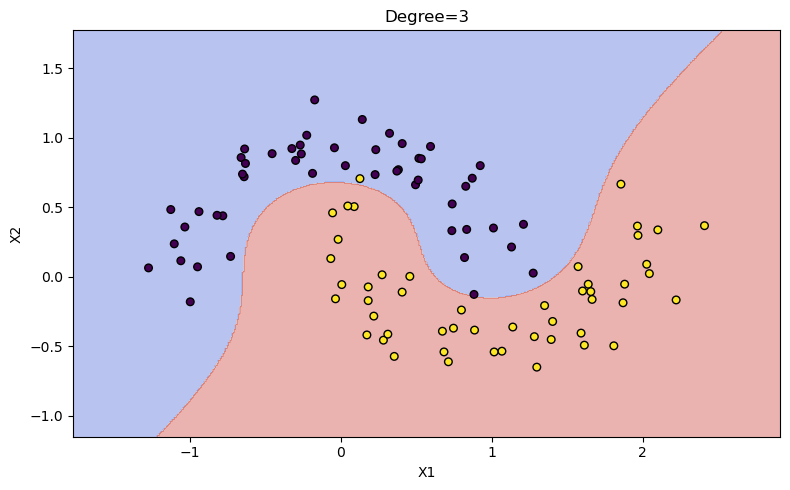

In [196]:
fig, axes = plt.subplots(1, 1, figsize=(8, 5))
get_decision_boundary_plot(X,y,poly_svm_clf, 3, axes)
plt.show()

### Instead of creating many poly features, we can use kernal trick. This will create the same effect without having to add 100s of features

In [197]:
from sklearn.svm import SVC

In [200]:
ploy_kernal_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel="poly", degree=10, coef0=1, C=5 )
                                   
                                   )

In [201]:
ploy_kernal_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, degree=10, kernel='poly'))])

The `coef0` hyperparameter controls how much the model is influenced by high-degree terms versus low-degree terms

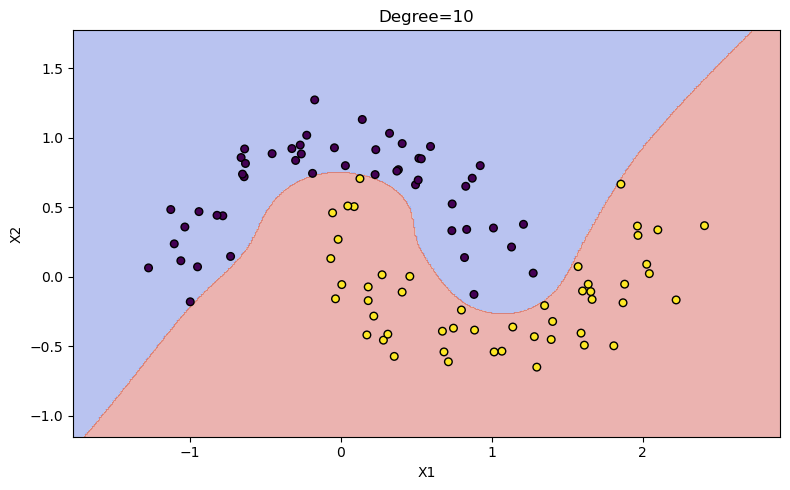

In [203]:
fig, axes = plt.subplots(1, 1, figsize=(8, 5))
get_decision_boundary_plot(X,y,ploy_kernal_svm_clf, 10, axes)
plt.show()

## What is the Kernel Trick?

The Kernel Trick is a mathematical technique used in Support Vector Machines (SVM) to handle non-linearly separable data.  

•	Problem: In real-world scenarios, data is often not linearly separable (i.e., you can’t draw a straight line to separate the classes).  
•	Solution: The Kernel Trick helps by transforming data into a higher-dimensional space where it becomes linearly separable.

When you use a Polynomial Kernel in SVM:

What Happens?

1.	Data Transformation:  
•	The polynomial kernel implicitly transforms the original data into a higher-dimensional space.   
•	This transformation allows the SVM to find patterns that aren’t visible in the original space.   
2.	Controlled by the Degree Hyperparameter ( d ):  
•	The degree hyperparameter controls the complexity of the decision boundary.  
•	Higher degree = more complex, flexible boundaries.  
•	Lower degree = simpler boundaries.  
3.	Non-Linear Decision Boundary:  
•	Even though the data is in 2D, the SVM fits a non-linear boundary because the data has been mapped to a higher-dimensional feature space.  
•	In the original space, this results in curved decision boundaries.  